# Introduction

A freshman-friendly tutorial for Ark platform.

## Overview

### Why Ark?

Ark is a platform that supports multiple kinds of models running.

### Productions

Productions in ARK, including models, agents and something else.

### Rodemap

Rodemap and primary changelog of Ark.

## Installation

Install Ark SDK from Github repository:

> We use Githubfast mirror here to accelerate github clone.

In [ ]:
%pip install git+https://githubfast.com/LotsoTeddy/ArkIntelligence.git

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
  Cloning https://githubfast.com/LotsoTeddy/ArkIntelligence.git to /tmp/pip-req-build-hmyaf50x
  Running command git clone --filter=blob:none --quiet https://githubfast.com/LotsoTeddy/ArkIntelligence.git /tmp/pip-req-build-hmyaf50x
  Resolved https://githubfast.com/LotsoTeddy/ArkIntelligence.git to commit edd33652ebbb3be462b810930595f29c222904c0
  Preparing metadata (setup.py) ... done
  Created wheel for ArkIntelligence: filename=ArkIntelligence-1.0.0-py3-none-any.whl size=14326 sha256=57699b8fe7e2a4d79421f878513c90b7c7910582ecfdf875754c0d38846c67df
  Stored in directory: /tmp/pip-ephem-wheel-cache-8meaf9u1/wheels/be/c8/35/4db1f9ade531ea4dcdf1cd65d47f490cd197e0d3cabe7847a7
Successfully built ArkIntelligence


## Quickstart

Before using the ArkIntelligence, set your api key as environment variable:

In [ ]:
import os

os.environ["ARK_API_KEY"] = "your_ark_api_key"

Then, you can chat with a model:

In [5]:
from arkintelligence.model import ArkModel

model = ArkModel(model="doubao-1.5-pro-32k-250115")

response = model.chat(prompt="Who are you?")
response

2025-04-01 20:09:19 | INFO     | ArkModel.py:12 - Initializing model [doubao-1.5-pro-32k-250115]
2025-04-01 20:09:19 | WARNING  | ArkModel.py:21 - Model context is disabled, the chat performance will be poor.


"I'm Doubao, an AI here to have conversations, offer information, and help you with a wide variety of questions. Whether it's about history, science, technology, or just having a friendly chat, I'm glad to assist you! "

Or, you can create a Translator agent to translate your text from English to Chinese:

In [7]:
from arkintelligence.agent import ArkAgent

agent = ArkAgent(
    name="Translator",
    model="doubao-1.5-pro-32k-250115",
    prompt="Translate the input text from English to Chinese.",
)

res = agent.run("Inspire Creativity, Enrich Life!")
res

2025-04-01 20:10:55 | INFO     | ArkAgent.py:24 - Initializing [Translator] agent with model [doubao-1.5-pro-32k-250115]
2025-04-01 20:10:55 | INFO     | ArkModel.py:12 - Initializing model [doubao-1.5-pro-32k-250115]
2025-04-01 20:10:55 | WARNING  | ArkModel.py:21 - Model context is disabled, the chat performance will be poor.
2025-04-01 20:10:55 | DEBUG    | ArkAgent.py:51 - user: Inspire Creativity, Enrich Life!


2025-04-01 20:10:56 | DEBUG    | ArkAgent.py:55 - assistant: ChatCompletion(id='021743509455247c3dbaef3e90dd8e661a64b6f58e4da68c0b8d0', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='激发创造力，丰富生活！', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None))], created=1743509456, model='doubao-1-5-pro-32k-250115', object='chat.completion', service_tier='default', system_fingerprint=None, usage=CompletionUsage(completion_tokens=6, prompt_tokens=37, total_tokens=43, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=None, audio_tokens=None, reasoning_tokens=0, rejected_prediction_tokens=None), prompt_tokens_details=PromptTokensDetails(audio_tokens=None, cached_tokens=0)))
2025-04-01 20:10:56 | CRITICAL | ArkAgent.py:110 - Final response: 激发创造力，丰富生活！


'激发创造力，丰富生活！'

# Basic usage

## Overview

### Text capabilities

#### Single-turn completion

Single-turn completion has no memory, so the previous user chat will not stored during chat. For example:

In [9]:
from arkintelligence.model import ArkModel

model = ArkModel(model="doubao-1.5-pro-32k-250115")

response = model.chat(prompt="Your name is ArkIntelligence.")
print(response)

response = model.chat(prompt="What is your name?")
print(response)

2025-04-01 20:11:29 | INFO     | ArkModel.py:12 - Initializing model [doubao-1.5-pro-32k-250115]
2025-04-01 20:11:29 | WARNING  | ArkModel.py:21 - Model context is disabled, the chat performance will be poor.


Alright! I'm ArkIntelligence, ready to have great conversations and assist you. 
My name is Doubao. Nice to meet you!


#### Multi-turn chat

Multi-turn chat has memory, the model can remember the history messages by setting `enable_context=True` during initialization. For example:

In [ ]:
from arkintelligence.model import ArkModel

model = ArkModel(
    model="doubao-1.5-pro-32k-250115",
    enbale_context=True # Make LLM remember the context
    )

response = model.chat(prompt="Your name is ArkIntelligence.")
print(response)

response = model.chat(prompt="What is your name?")
print(response)

The model can remember the previous user input.

### Vision capabilities

Ark provides capabilities about multi-media, such as vision and sounds. Here we introduce the vision-related demos.

#### Image understanding

We use LLM to understand the following image:

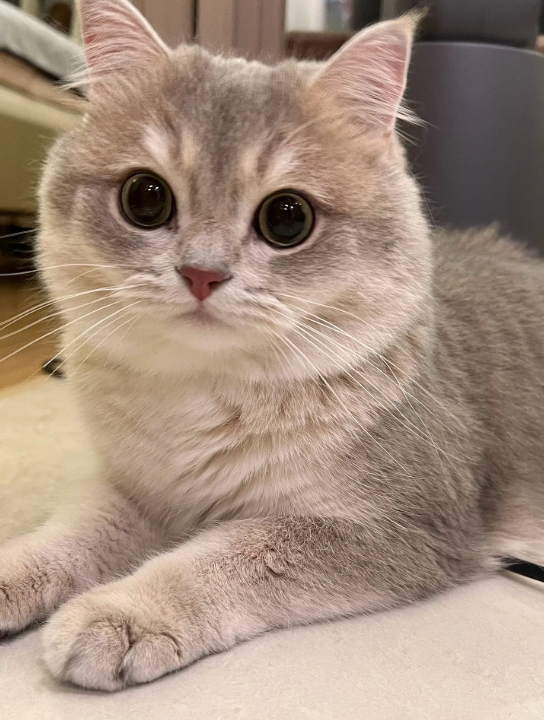


In [ ]:
from arkintelligence.model import ArkModel

IMAGE_PATH = "/root/ArkIntelligence/tutorial/assets/images/cat.png"
model = ArkModel(
    model="doubao-1.5-vision-pro-32k-250115",  # Use vision model here
)

response = model.chat(
    prompt="Please describe this image with details.",
    attachment=IMAGE_PATH,
)
response

#### Video generation

We use doubao to generate a video according to a static image and prompt:





> Want to make the video more vivid? Maybe you need: prompt refine.

# Agent

## Your first agent

A simple agent can be built with several lines:

In [ ]:
from arkintelligence.agent import ArkAgent

agent = ArkAgent(
    name="Completion assistant",
    model="deepseek-v3-250324",
    prompt="You are a helpful assistant.",
)

Then you can chat with it:

In [ ]:
res = agent.run("Hello, what is your name?")
print(f"Response from agent: {res}")

A complex agent with several capabilities (such as knowledge base and function calling) just needs more 2 lines:

Introduce what the agent is.

## Prompt engineering

### Prompt usage

### Prompt refine

## Tools
